<a href="https://colab.research.google.com/github/MadMush/Rain-Prediction-in-Australia/blob/main/Australia_Rain_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries and dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv ('/content/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# **Dataset Properties**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.shape

(145460, 23)

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# **Data Processing**

In [ ]:
df = df.drop(['Date', 'Location', 'Evaporation','Sunshine','Cloud9am', 'Cloud3pm'], axis=1)

KeyError: ignored

In [ ]:
df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [ ]:
df.duplicated().sum()

299

In [ ]:
df.drop_duplicates(subset = None, keep='first', inplace=True, ignore_index=False)
df.shape

(145161, 17)

In [ ]:
df.isna().sum()

MinTemp           1186
MaxTemp            968
Rainfall          3011
WindGustDir      10027
WindGustSpeed     9964
WindDir9am       10267
WindDir3pm        3929
WindSpeed9am      1468
WindSpeed3pm      2763
Humidity9am       2355
Humidity3pm       4208
Pressure9am      14766
Pressure3pm      14729
Temp9am           1468
Temp3pm           3310
RainToday         3011
RainTomorrow      3019
dtype: int64

In [ ]:
df = df.dropna(axis=0)
df.shape

(112925, 17)

In [ ]:
df.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df['WindGustDir'] = l.fit_transform(df['WindGustDir'])
df['WindDir9am'] = l.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = l.fit_transform(df['WindDir3pm'])
df['RainToday'] = l.fit_transform(df['RainToday'])
df['RainTomorrow'] = l.fit_transform(df['RainTomorrow'])

<ipython-input-28-e302486dedf1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WindGustDir'] = l.fit_transform(df['WindGustDir'])
<ipython-input-28-e302486dedf1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WindDir9am'] = l.fit_transform(df['WindDir9am'])
<ipython-input-28-e302486dedf1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [ ]:
df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
145455,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0


# **Data Visualization**

<Axes: xlabel='RainToday', ylabel='count'>

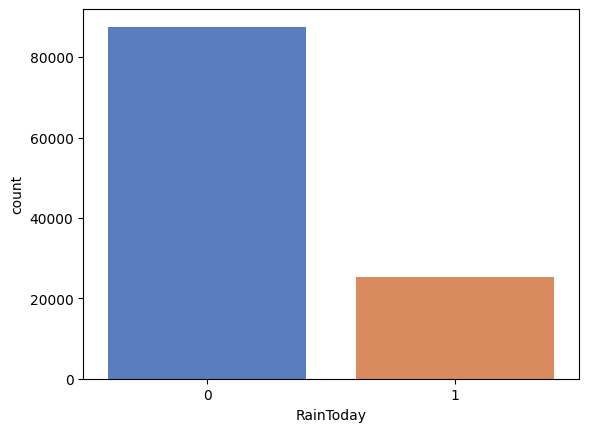

In [ ]:
sns.countplot(x=df['RainToday'], palette='muted')

<Axes: xlabel='RainTomorrow', ylabel='count'>

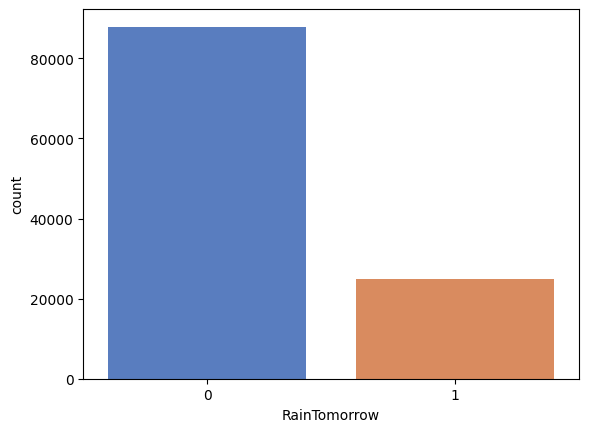

In [ ]:
sns.countplot(x=df['RainTomorrow'], palette='muted')

<Axes: xlabel='MinTemp', ylabel='Count'>

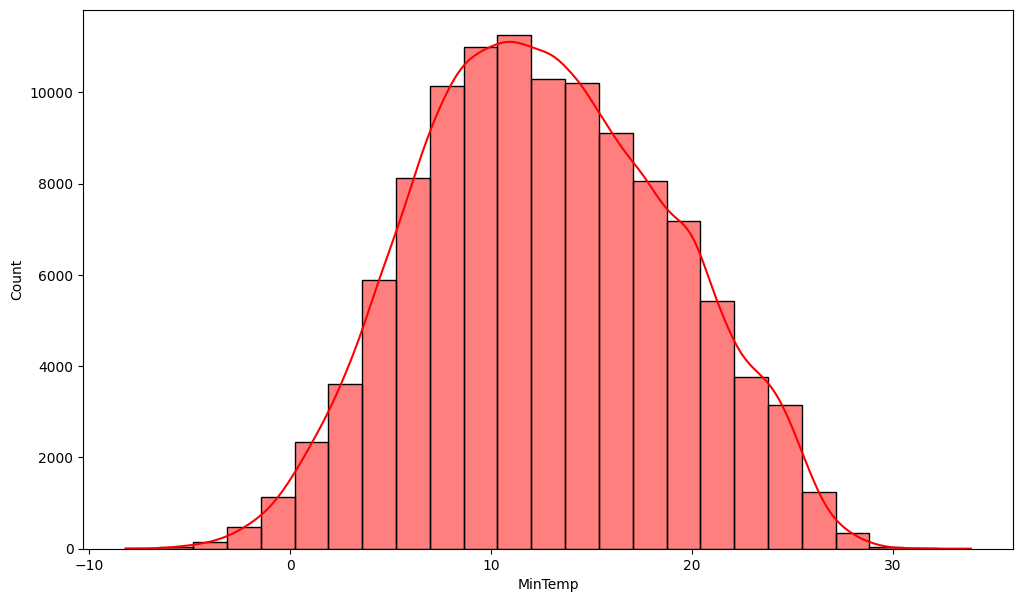

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(df['MinTemp'], kde='True', color="red", bins=25)

In most cases, the minimum temperature is between 8-15.

<Axes: xlabel='MaxTemp', ylabel='Count'>

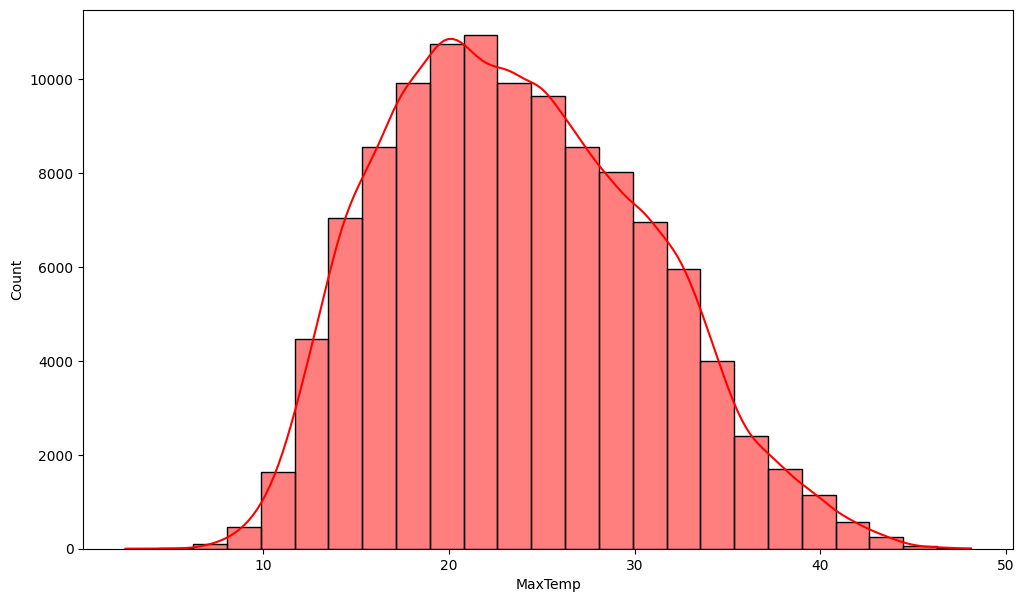

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(df['MaxTemp'], kde='True', color="red", bins=25)

In most cases, the maximum temperature is between 19-25.

<Axes: xlabel='Humidity9am', ylabel='Humidity3pm'>

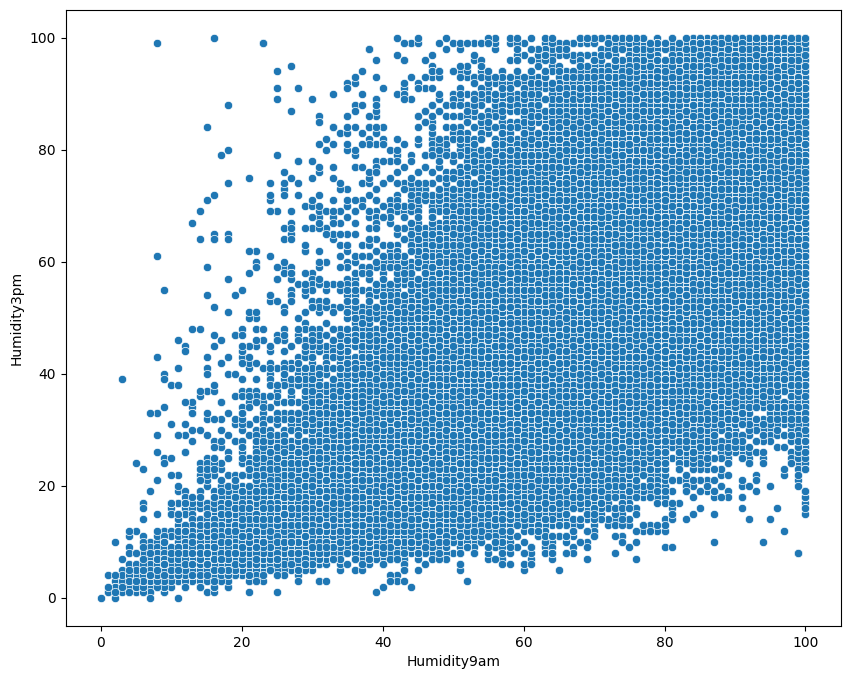

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Humidity9am', y='Humidity3pm', data=df)

There is a positive relationship between the humidity of 9am and 3pm

<Axes: xlabel='Pressure9am', ylabel='Pressure3pm'>

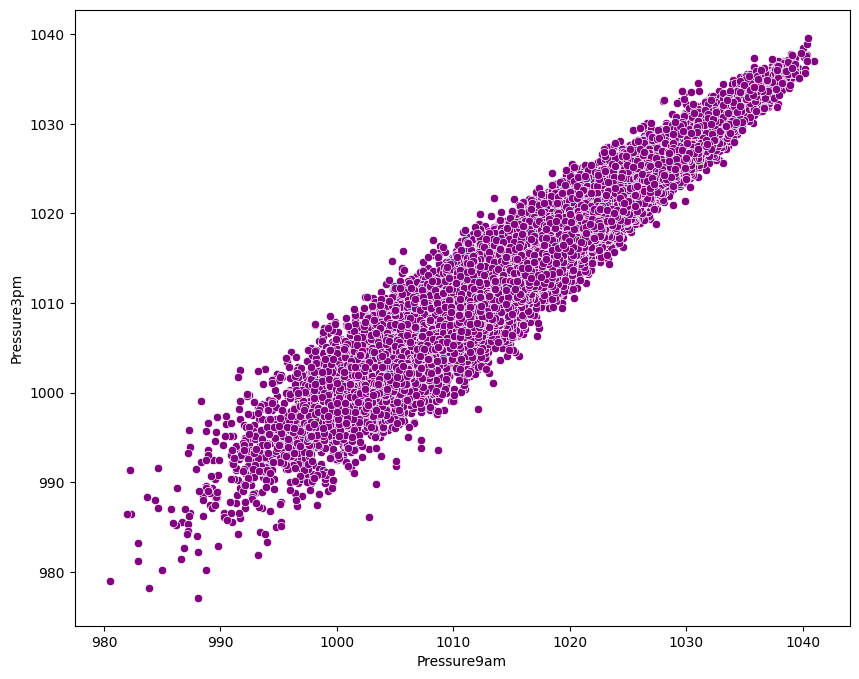

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Pressure9am', y='Pressure3pm', data=df, color='purple')

There is a positive relation between pressure of 9am and 3pm

<Axes: xlabel='WindSpeed9am', ylabel='WindSpeed3pm'>

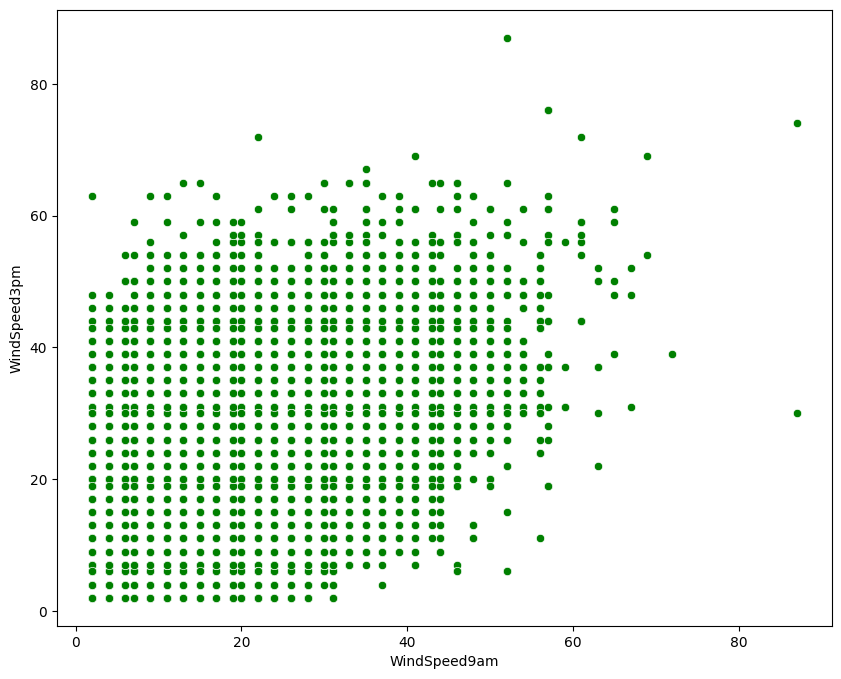

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='WindSpeed9am', y='WindSpeed3pm', data=df, color='green')

There is a positive relationship between wind speed of 9am and 3pm

<Axes: xlabel='Temp9am', ylabel='Temp3pm'>

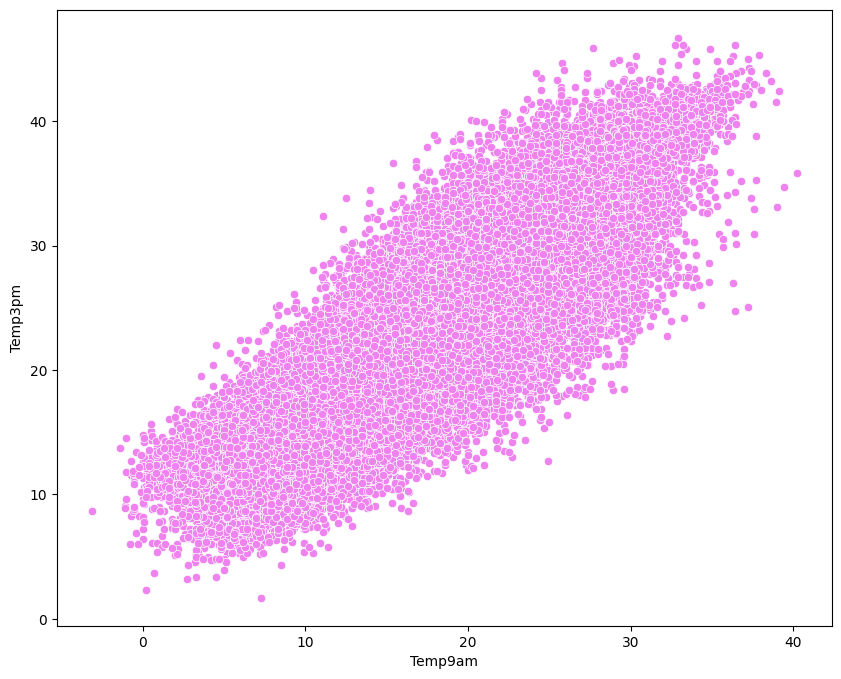

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Temp9am', y='Temp3pm', data=df, color='violet')

There is a positive relationship between temperature of 9am and 3pm

# **Pearson Correlation**

In [ ]:
df.corr()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.728942,0.103807,-0.166074,0.159176,-0.066436,-0.168547,0.150577,0.146078,-0.218312,0.026733,-0.433645,-0.448298,0.898785,0.704477,0.044605,0.078691
MaxTemp,0.728942,1.000000,-0.076825,-0.224415,0.056742,-0.248406,-0.178135,-0.006114,0.013976,-0.517188,-0.497679,-0.312597,-0.411360,0.884925,0.984357,-0.242983,-0.168872
Rainfall,0.103807,-0.076825,1.000000,0.044939,0.130388,0.084177,0.046577,0.085376,0.060288,0.238756,0.259652,-0.167595,-0.126520,0.007418,-0.080376,0.497554,0.238379
WindGustDir,-0.166074,-0.224415,0.044939,1.000000,0.134843,0.403542,0.601054,0.023290,0.099502,0.071479,0.049654,-0.139715,-0.041799,-0.203700,-0.240127,0.137906,0.051767
WindGustSpeed,0.159176,0.056742,0.130388,0.134843,1.000000,0.025126,0.134630,0.589735,0.679223,-0.183729,-0.020903,-0.445046,-0.399751,0.124733,0.018325,0.154943,0.238664
WindDir9am,-0.066436,-0.248406,0.084177,0.403542,0.025126,1.000000,0.305955,0.010127,0.077561,0.153097,0.174934,-0.027734,0.070185,-0.158258,-0.252886,0.174094,0.029832
WindDir3pm,-0.168547,-0.178135,0.046577,0.601054,0.134630,0.305955,1.000000,0.045438,0.092563,0.029611,-0.017852,-0.144080,-0.041820,-0.182641,-0.191912,0.126229,0.026099
WindSpeed9am,0.150577,-0.006114,0.085376,0.023290,0.589735,0.010127,0.045438,1.000000,0.499372,-0.221500,-0.017875,-0.201550,-0.150433,0.089493,-0.019280,0.099773,0.093173
WindSpeed3pm,0.146078,0.013976,0.060288,0.099502,0.679223,0.077561,0.092563,0.499372,1.000000,-0.093364,0.053916,-0.284036,-0.244390,0.126778,-0.011471,0.087702,0.096277
Humidity9am,-0.218312,-0.517188,0.238756,0.071479,-0.183729,0.153097,0.029611,-0.221500,-0.093364,1.000000,0.684373,0.115345,0.168052,-0.464487,-0.510028,0.378306,0.276704


<Axes: >

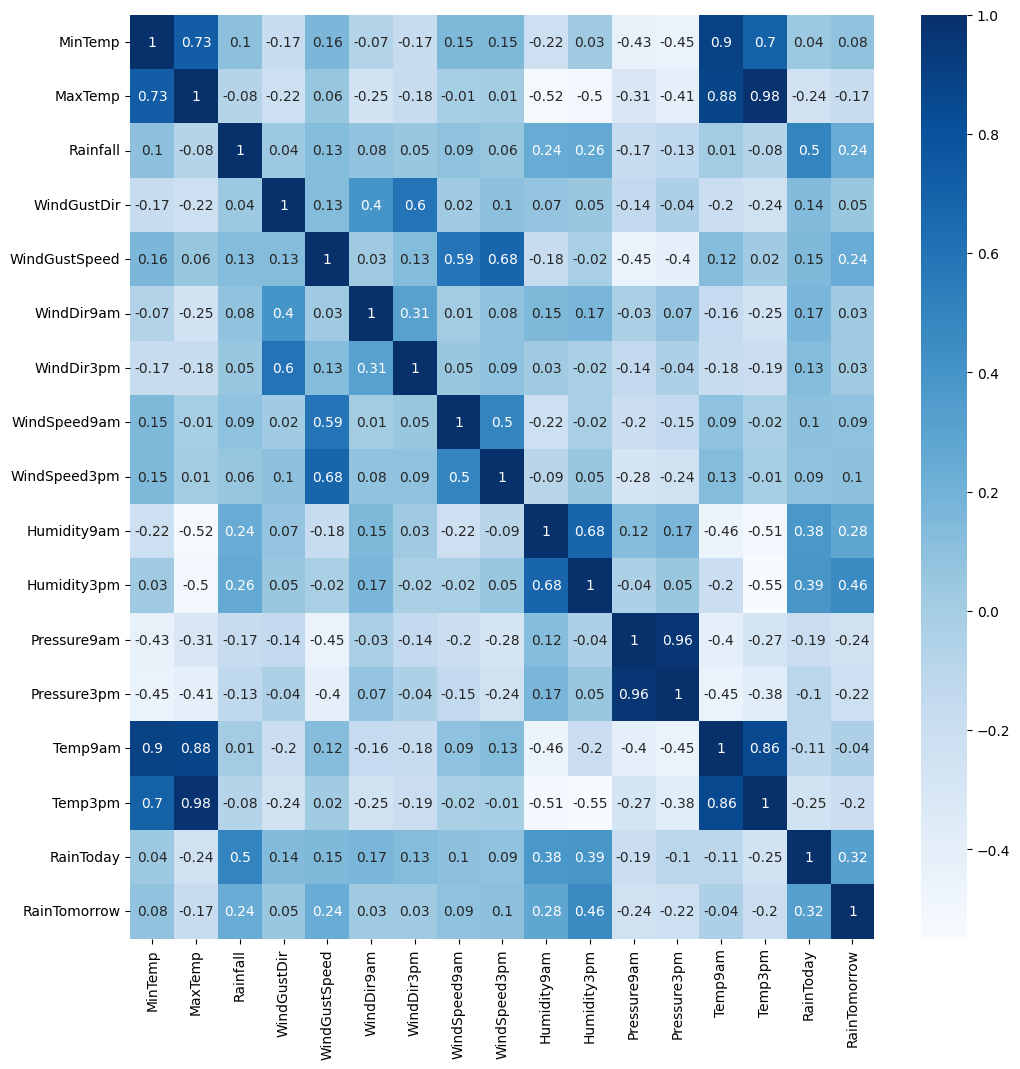

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(round(df.corr(), 2), annot = True, cmap='Blues')

# **XGBoost Classifier**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop(['RainTomorrow'], axis=1)
y=df['RainTomorrow']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 26)

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
model = xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)
predictions

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, predictions)

0.8588169313418738

The model is 85.8% accurate in prediction